## Introduction to Basemap

The matplotlib library provides hooks for creating extensions called toolkits. To date, several have been created to compliment matplotlib, and over the course of the next few lessons, we'll be using one in particular, called Basemap, for mapping data.

The Basemap matplotlib toolkit is a library for plotting 2-dimensional data onto maps. As an extension to matplotlib, Basemap does not do any of the plotting itself, but instead it provides several map projections for transforming geographic coordinates into points on a 2-dimensional cartesian plane, in other words, these projections turn longitude and latitude into x and y coordinates. Basemap was created by scientists for scientists, and as such, it can be a bit cumbersome to work with at times for the layman, but it's extremely powerful and featureful, and is likely to be the only tool you'll ever need for mapping data with matplotlib.

In this lesson, we'll see how to use the Basemap library to draw a simple map of the world complete with political boundaries and lines of longitude and latitude. 

Before we can draw our map, however, we first need to setup our environment and choose a projection method.

<!---
In this lesson, we'll take our first steps with Basemap. We'll be using the toolkit to draw a simple map of the world and style it to make it aesthetically pleasing. In this lesson

In this lesson, we'll take our first steps with Basemap. We'll be using the toolkit to draw a simple map of the world, and along the way, we'll see how to do things like draw the meridians and parallels on a map, otherwise known as the longitude and latitude lines on a map. We'll see how to draw the coastlines and political borders of a map. And, how to style a map to make it aesthetically pleasing as well as informative. But, before we can do any of those things, our very first task at hand is choosing a map projection.
--->

In [1]:
# The current version of NumPy available from conda is issuing a warning 
# message that some behavior will change in the future when used with the 
# current version of matplotlib available from conda. This cell just keeps
# that warning from being displayed.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats

# Turn on retina display mode
set_matplotlib_formats('retina')

# Turn off interactive mode
plt.ioff()

## Choosing a Projection

As we learned in the previous lesson, the act of transforming points on a 3-dimensional object to coordinates on a 2-dimensional surface is not something that can be done without some error. As a result, every map you've ever used is in some way incorrect, but even with inaccuracies, each has some advantage in particular use cases. The example we gave in the last section was that of the mercator projection which has advantages for nautical navigation at the expense of greatly distorting the size of some land masses. 

Picking the right map projection is a question of trade-offs. You need to think about your data, and the message you're trying to convey, and choose the right projection for both. However, since this is a course on matplotlib and not mapping, getting into the details of how to choose the right map projection is well outside of the scope of this course, but if you're interested in learning more, I've included a few links to some excellent articles below.

> Some good articles on map projections, the problems associated with them, and choosing the right one.
- [Choosing the Right Map Projection][1]
- [Why Google Maps gets Africa wrong][2]

Now, to get a list of the projections available in the Basemap library, just import the `basemap` module and print the `basemap.supported_projections` variable. This will print out a table with the abbreviated names that you'll pass into the `Basemap` constructor, and a brief description of the type of each map projection. The [Basemap documentation][3] also has a list of each projection with a link to a short explanation of each one and an example of how to use it. 

[1]: https://source.opennews.org/en-US/learning/choosing-right-map-projection/
[2]: http://www.theguardian.com/world/2014/apr/02/google-maps-gets-africa-wrong
[3]: http://matplotlib.org/basemap/users/mapsetup.html

In [2]:
from mpl_toolkits import basemap
print basemap.supported_projections

 cea              Cylindrical Equal Area                  
 mbtfpq           McBryde-Thomas Flat-Polar Quartic       
 aeqd             Azimuthal Equidistant                   
 sinu             Sinusoidal                              
 poly             Polyconic                               
 omerc            Oblique Mercator                        
 gnom             Gnomonic                                
 moll             Mollweide                               
 lcc              Lambert Conformal                       
 tmerc            Transverse Mercator                     
 nplaea           North-Polar Lambert Azimuthal           
 gall             Gall Stereographic Cylindrical          
 npaeqd           North-Polar Azimuthal Equidistant       
 mill             Miller Cylindrical                      
 merc             Mercator                                
 stere            Stereographic                           
 eqdc             Equidistant Conic                     

As you can see from the list above, there are plenty of projections to choose from, but for this example, we'll be using the Robinson projection. 

### The Robinson Projection

The [Robinson projection][2] was created by [Arthur H. Robinson][3] in 1963 for the Rand McNally company. We'll be using it here for a few reasons. First, it's a projection that's meant to show the entire world at once, and since we're planning on showing the entire world, this projection is exactly what we're looking for. 

Second, the Robinson projection is, in my opinion at least, just a really good looking map. The approach that Dr. Robinson took when designing his projection, according to a 1988 [New York Times article][4], was backwards from most mapmakers. Rather than starting with the math, he approached the problem more artistically, visualizing the best-looking shapes and sizes first, and then figuring out the mathematical formula later to produce the effect he wanted. The result was a map projection that was so good it became the general purpose map for the National Geographic Society for nearly all of the nineties. 

Finally, every projection has a set of required parameters that you must specify when creating the projection, for the Robinson projection that set is minimal. In fact, only one parameter is needed to create the Robinson projection and that's the longitude of the center of the map. We'll be using the [prime meridian][5] as our central point, so the only parameter we'll need to pass in is a longitude of $0^{\circ}$.

Creating our projection is easy. Simply call the `Basemap` constructor and pass in the name of the projection that you want to use---in our case that will be `'robin'`. Then we just specify the longitude of the center of the map by passing it in as the value of the `lon_0` parameter. 

<!---
Finally, we're going to specify the resolution of the map. This setting determines how detailed the boundaries of the map (e.g., the coastlines) will be. The options available for the resolution are `'c'` (crude), `'l'` (low), `'i'` (intermediate), `'h'` (high), `'f'` (full) or `None`. The higher the resolution the longer it takes to draw the map. The default value for this is 'c', which we will go ahead and specify in our example. If None is chosen for this parameter, no boundary data will be read in and any calls to methods such as `drawcoastlines` will raise an error.
--->

[1]: https://en.wikipedia.org/wiki/Robinson_projection
[2]: http://matplotlib.org/basemap/users/robin.html
[3]: https://en.wikipedia.org/wiki/Arthur_H._Robinson
[4]: http://www.nytimes.com/1988/10/25/science/the-impossible-quest-for-the-perfect-map.html
[5]: https://en.wikipedia.org/wiki/Prime_meridian

In [3]:
# Create a Robinson projection that's centered around 
# longitude 0 (the prime meridian)
m = Basemap(projection='robin', lon_0=0.)  

Now that we have a map projection object, let's go ahead and set up our map. The lines below will create a new figure, set the background color, and remove the outline from the map.

In [4]:
fig = plt.figure(figsize=(20,10))

# Fill the background of the map with a greyish color
fig.patch.set_facecolor('#e6e8ec')

# Draw the white map background and remove the boundary line
m.drawmapboundary(color='none', fill_color='white');

The next step is to draw the map itself. The lines below will draw the coastlines, fill all of the continents, and draw the political boundaries between countries.

In [5]:
# Draw the continents and the countries

# This line isn't necessarily needed, but it does add some extra definition 
# to some geographic elements (the Amazon river, for example).
m.drawcoastlines(color='white')
m.fillcontinents(color='black', lake_color='white')
m.drawcountries(linewidth=1, color='white');

Finally, we'll draw the graticule---the network of lines representing the meridians and parallels, or longitude and latitude lines respectively.

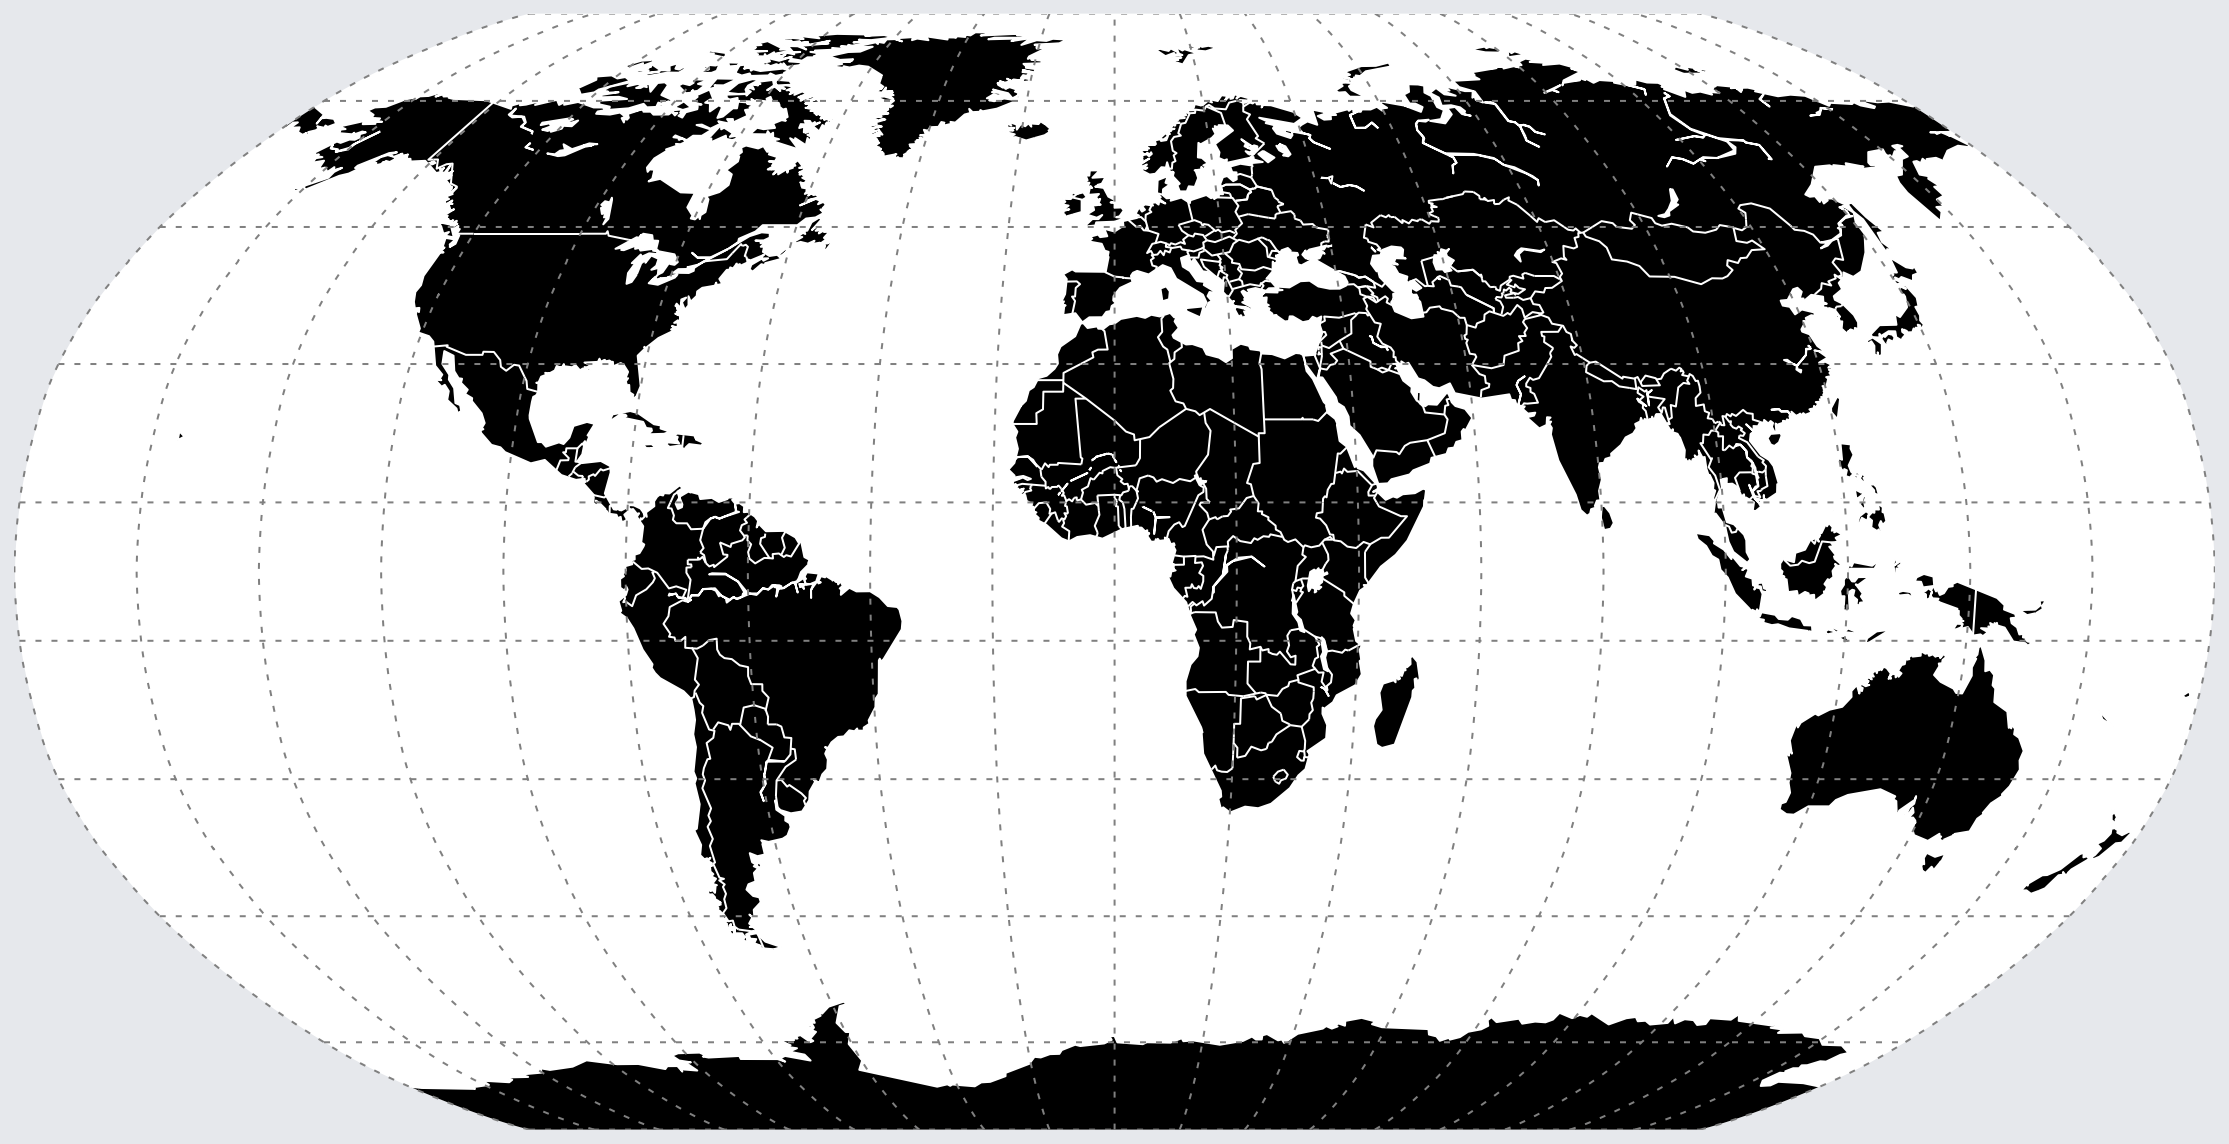

In [6]:
# Draw the meridians (longitude) and parallels (latitude)

# The space between each line in the graph
graticule_width = 20
# Create lists of meridians and parallels to draw on map
parallels = np.arange(-90, 91, graticule_width)
meridians = np.arange(-180., 181., graticule_width)
# The pattern for the dashes in the graticule lines. The default is
# [1,1], but we're going with 3 pixels on, 5 pixels off.
dashes = [3, 5] 
# The color of the graticule lines
graticule_color = 'grey'

m.drawparallels(parallels, 
                dashes=dashes, 
                color=graticule_color)

m.drawmeridians(meridians, 
                dashes=dashes, 
                color=graticule_color)

plt.show();

## Conclusion

And, with the map above complete, we've come to the end of this tutorial. In this lesson, we created our first map using the Basemap library. We learned how to create a map projection and how to use it to draw a map and style it slightly. 

In the coming lessons we'll build on these skills to create a couple of interesting data visualizations with maps. 

## Acknowledgements

This notebook shows how to work with maps in Python using matplotlib and basemap. It is based on two articles: ["Working With Maps in Python"][1] by Max Berggren which is itself based on the second article ["Working with shapefiles, projections and world maps in ggplot"][2] by Kristoffer Magnusson. The latter uses R and ggplot and the former is a translation of the latter into Python using matplotlib and the [basemap][3] library.

[1]: http://maxberggren.github.io/2015/08/04/basemap/
[2]: http://rpsychologist.com/working-with-shapefiles-projections-and-world-maps-in-ggplot
[3]: http://matplotlib.org/basemap/